In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_csv = r'C:\Users\rocks\Desktop\nasscom hackathon\warangal.csv'

In [4]:
warangal = pd.read_csv(path_csv, index_col='Dates', parse_dates=True)

In [5]:
warangal.head()

,S02,NOX,PM10,NH3,AQI
Dates,,,,,
Jan-16,7.0,26.0,76,22,76
Feb-16,7.0,19.0,72,21,72
Mar-16,7.1,21.8,63,24,63
Apr-16,7.0,20.0,73,21,73
May-16,8.0,19.0,84,21,84


In [6]:
train = warangal.iloc[:72]

In [7]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [8]:
def split_squences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i+n_steps
        if end_ix > len(sequences)-1:
            break
        seq_x , seq_y = sequences[i:end_ix, :], sequences[end_ix-1, -1]   # change here which features to use
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [9]:
train = train.to_numpy()

In [10]:
train.shape

(72, 5)

In [11]:
n_steps = 12
X, y = split_squences(train, n_steps)


In [13]:
n_features = X.shape[2]
n_features

5

In [14]:
# define model 
model = Sequential()
model.add (Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = (n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')


In [15]:
model.fit(X, y, epochs=1000)


Epoch 1/1000
2/2 [==============================] - 1s 9ms/step - loss: 7492.0137
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 4289.8442
Epoch 3/1000
2/2 [==============================] - 0s 7ms/step - loss: 2067.7451
Epoch 4/1000
2/2 [==============================] - 0s 11ms/step - loss: 801.7877
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 313.9754
Epoch 6/1000
2/2 [==============================] - 0s 6ms/step - loss: 355.6366
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 666.8518
Epoch 8/1000
2/2 [==============================] - 0s 6ms/step - loss: 812.7170
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 747.9013
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 542.6429
Epoch 11/1000
2/2 [==============================] - 0s 8ms/step - loss: 371.3656
Epoch 12/1000
2/2 [==============================] - 0s 7ms/step - loss: 257.0709
Epoch 13/1000
2/2 [==

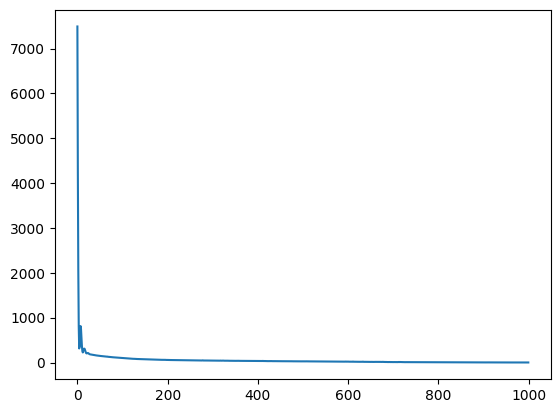

In [16]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [17]:
loss_per_epoch[-1]

1.0807207822799683

In [18]:
test= warangal[72:]
test= test.to_numpy()

In [19]:
last_train_batch =train[-12:, :]
last_train_batch = last_train_batch.reshape((1, n_steps, n_features))

In [20]:
model.predict(last_train_batch)[0]

1/1 [==============================] - 0s 98ms/step


array([88.76593], dtype=float32)

In [28]:
current_prediction

array([[88.76593]], dtype=float32)